The edge set E(G) is : (1, 3), (2, 0), (5, 3), (3, 4), (4, 0)


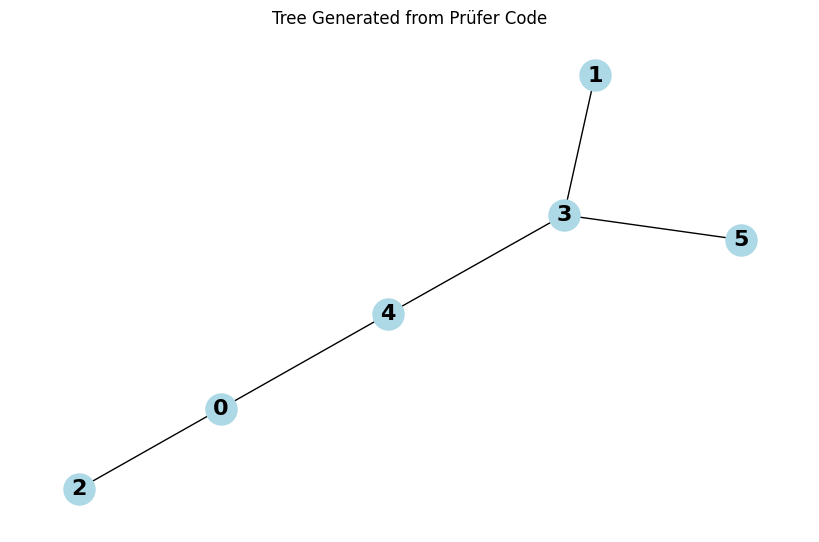

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

def prufer_to_tree_edges(prufer):
    vertices = len(prufer) + 2
    
    # Initialize the array of vertices
    vertex_set = [0] * vertices
    edges = []
    
    # Count the number of occurrences of each vertex in the Prüfer code
    for i in range(vertices - 2):
        vertex_set[prufer[i] - 1] += 1

    # Find the smallest label not present in the Prüfer set
    for i in range(vertices - 2):
        for j in range(vertices):
            if vertex_set[j] == 0:
                edges.append((j + 1, prufer[i]))
                vertex_set[j] = -1
                vertex_set[prufer[i] - 1] -= 1
                break

    remaining_leaves = [i + 1 for i, count in enumerate(vertex_set) if count == 0]
    edges.append((remaining_leaves[0], 0))

    return edges

# Prüfer code to convert
prufer_code = [3, 0, 3, 4]
edges = prufer_to_tree_edges(prufer_code)

# Print the edges
formatted_edges = ', '.join([f"({a}, {b})" for a, b in edges])
print(f"The edge set E(G) is : {formatted_edges}")

# Plot the graph
G = nx.Graph()
G.add_edges_from(edges)

plt.figure(figsize=(8, 5))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=16, font_weight='bold')
plt.title("Tree Generated from Prüfer Code")
plt.show()
